<a href="https://colab.research.google.com/github/Dkepffl/2022-2-ESAA/blob/main/Project(2)/%EC%8B%9C%EA%B0%81%ED%99%94_%ED%95%A9%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 출력 결과를 셀 아래 inline으로 표시
%matplotlib inline

## **데이터셋 불러오기**

In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/22-2 ESAA OB 1조/OB 프로젝트(2)/Data/marketing_campaign.csv', sep='\t') # 구분자가 tab 키

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- `Income` 컬럼에만 결측치가 34개 있다.
- Categorical Variable(in People)
  + `Year_Birth`
  + `Education`
  + `Marital_Status`
  + `Complain`
- Numerical Variable(in People)
  + `Income`
  + `Kidhome`
  + `Teenhome`
  + `DT_Customer`(datatime)
  + `Recency`

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## **EDA**

### **People**
- `ID` : Customer's unique identifier
- `Year_Birth` : Customer's birth year
- `Education`: Customer's education level
- `Marital_Status`: Customer's marital status
- `Income`: Customer's yearly household income
- `Kidhome`: Number of children in customer's household
- `Teenhome`: Number of teenagers in customer's household
- `Dt_Customer`: Date of customer's enrollment with the company
- `Recency`: Number of days since customer's last purchase
- `Complain` : 1 if the customer complained in the last 2 years, 0 otherwise

#### **ID**

In [ ]:
sum(df.duplicated(['ID'])) # ID가 같은 열 개수

0

#### **Year_Birth**
- 해당 컬럼은 고객의 출생연도 데이터를 가지고 있다.
- `Year_Birth`의 최솟값이 1893이다.
- 먼저 히스토그램을 그려보았다.

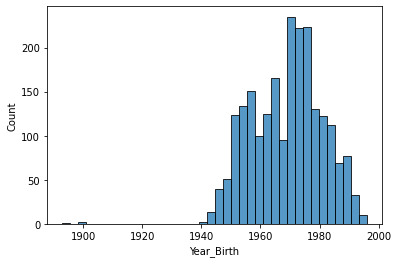

In [ ]:
# Histogram
sns.histplot(df['Year_Birth'], color='g')

- 좀 더 직관적으로 고객의 나이별 분포를 확인하기 위하여, 이번에는 현재 연도와의 차이를 이용하여, 나이를 구하고 10대, 20대, 30대 등 연령대별 고객 분포를 확인해보았다.

In [ ]:
# 기존 데이터프레임 복사
df_age = df.copy()

current_year=2022 # 현재 연도
df_age['Age'] = df_age['Year_Birth'].apply(lambda x : current_year - x) # age 컬럼 생성
df_age['Age'].describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

In [ ]:
# 20대, 30대, 40대, 50대, 60대, 70대 이상으로 분류하는 함수
def classify_age(x):
  if x < 30:
    return 'group 20'
  elif x < 40:
    return 'group 30'
  elif x < 50:
    return 'group 40'
  elif x < 60:
    return 'group 50'
  elif x < 70:
    return 'group 60'
  else:
    return 'group over 70'

In [ ]:
df_age['Age_group'] = df_age['Age'].apply(classify_age) # age_group 컬럼 생성
df_age['Age_group'].head()

0    group 60
1    group 60
2    group 50
3    group 30
4    group 40
Name: Age_group, dtype: object

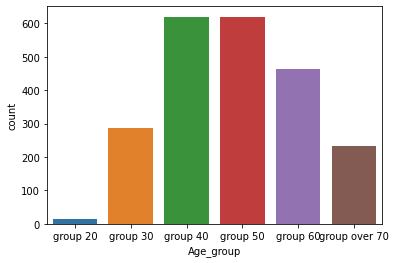

In [ ]:
sns.countplot(data=df_age, x='Age_group', order=['group 20', 'group 30', 'group 40','group 50','group 60', 'group over 70'])
plt.show()

- 40~60대인 고객이 많다.
- 20대인 고객이 적다.
- 이상치가 있는지 확인해보기 위해 박스 그래프를 그려보았다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


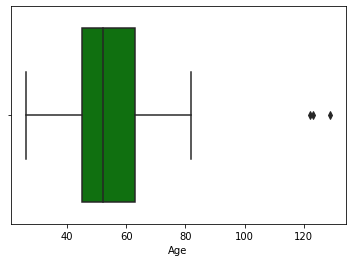

In [ ]:
sns.boxplot(df_age['Age'], color='g')

#### **Education**

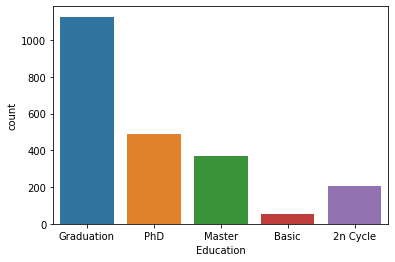

In [ ]:
sns.countplot(data=df, x='Education')
plt.show()

#### **Marital_Status**

In [ ]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

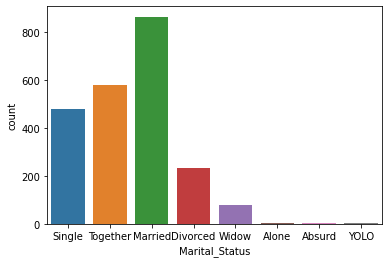

In [ ]:
sns.countplot(data=df, x='Marital_Status')
plt.show()

#### **Income**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


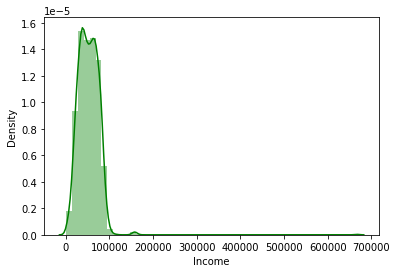

In [ ]:
# Histogram
sns.distplot(df['Income'], color='g')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


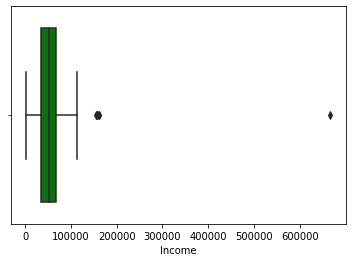

In [ ]:
sns.boxplot(df_age['Income'], color='g')

- 이상치는 제거하고 결측치는 평균으로 처리
- 교육 수준에 따른 소득 수준을 확인하기 위해 산점도를 그려보았다.

In [ ]:
sum(df['Income'].isnull())

24

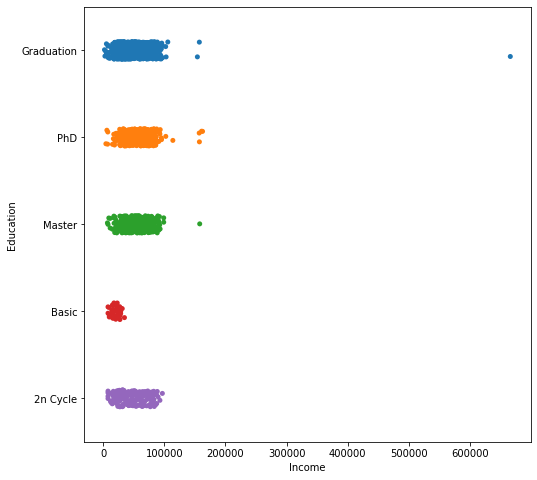

In [ ]:
plt.figure(figsize=(8,8))
sns.stripplot(x='Income', y='Education', data=df)

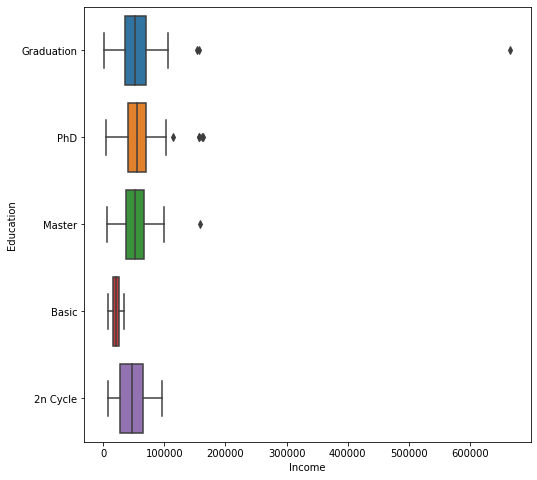

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Income', y='Education', data=df)

#### **Kidhome**

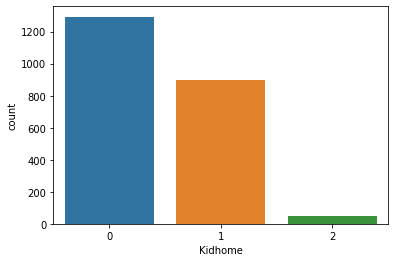

In [ ]:
sns.countplot(data=df, x='Kidhome')
plt.show()

#### **Teenhome**

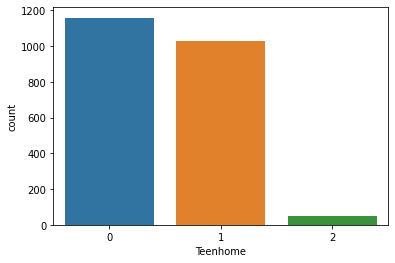

In [ ]:
sns.countplot(data=df, x='Teenhome')
plt.show()

- `KIdHome`와 `Teenhome`을 합쳐서 자녀수 피처를 만든다.

#### **Dt_Customer**
- 회원 기간
- '일-월-연도' 날짜 형식의 데이터로 datetime으로 데이터타입을 변경해주어야 한다.

In [ ]:
df['Dt_Customer'].head() # 일-월-연도

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [ ]:
# datetime으로 변환
from datetime import datetime

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
df['Dt_Customer'].head() 

0   2012-04-09
1   2014-08-03
2   2013-08-21
3   2014-10-02
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [ ]:
df['Dt_Customer'].max()

Timestamp('2014-12-06 00:00:00')

In [ ]:
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year
df['Dt_Customer_Month'] = df['Dt_Customer'].dt.month

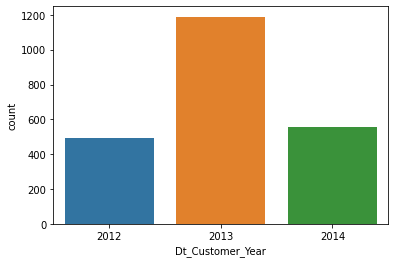

In [ ]:
sns.countplot(data=df, x='Dt_Customer_Year')
plt.show()

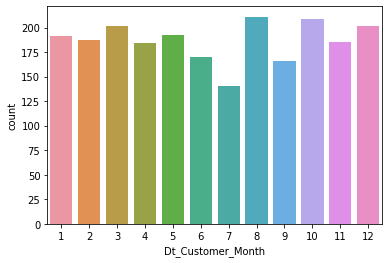

In [ ]:
sns.countplot(data=df, x='Dt_Customer_Month')
plt.show()

#### **Recency**
- 최근 주문일

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


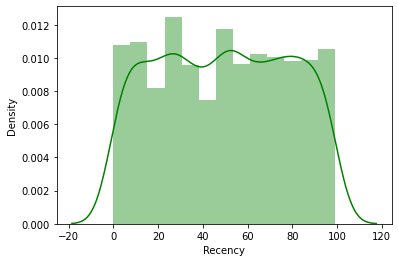

In [ ]:
# Histogram
sns.distplot(df['Recency'], color='g')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


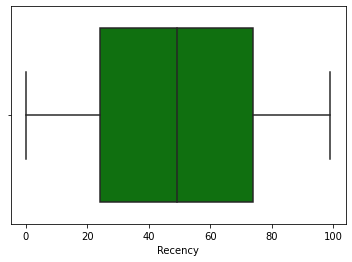

In [ ]:
sns.boxplot(df_age['Recency'], color='g')

In [ ]:
df['Recency'].min()

0

In [ ]:
df['Recency'].max()

99

#### **Complain**
- 1 : 최근 2년 동안 컴플레인을 넣은 고객
- 0 : 그렇지 않은 고객

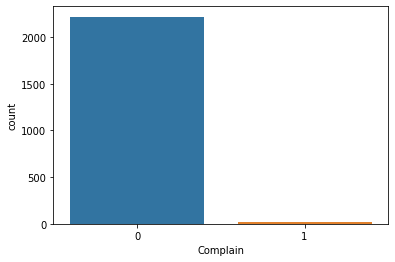

In [ ]:
sns.countplot(data=df, x='Complain')
plt.show()

In [ ]:
# number of customer who complained in last 2 years
sum(df['Complain']==1)

21

- Complain을 넣은 고객이 매우 적다.

### **Products**

#### **MntWines**
: Amount spent on wine in last 2 years

(array([1045.,  325.,  232.,  210.,  142.,   99.,   98.,   45.,   31.,
          13.]),
 array([   0. ,  149.3,  298.6,  447.9,  597.2,  746.5,  895.8, 1045.1,
        1194.4, 1343.7, 1493. ]),
 <a list of 10 Patch objects>)

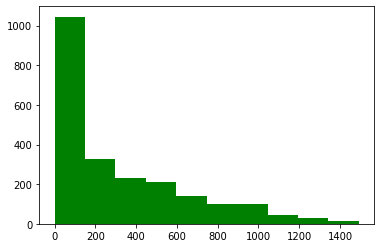

In [ ]:
plt.hist(df['MntWines'], color='g')

In [ ]:
df['MntWines'].describe()

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64

#### **MntFruits**
: Amount spent on fruits in last 2 years

(array([1469.,  283.,  145.,   95.,   75.,   53.,   48.,   28.,   27.,
          17.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

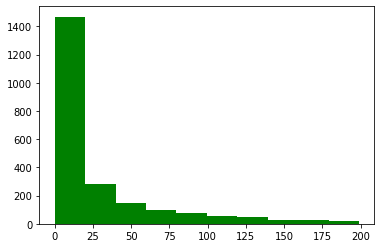

In [ ]:
plt.hist(df['MntFruits'], color='g')

In [ ]:
df['MntFruits'].describe()

count    2240.000000
mean       26.302232
std        39.773434
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64

#### **MntMeatProducts**
: Amount spent on meat in last 2 years

(array([1562.,  274.,  195.,  100.,   78.,   26.,    0.,    0.,    0.,
           5.]),
 array([   0. ,  172.5,  345. ,  517.5,  690. ,  862.5, 1035. , 1207.5,
        1380. , 1552.5, 1725. ]),
 <a list of 10 Patch objects>)

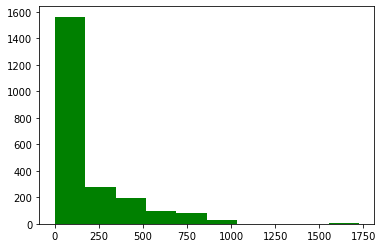

In [ ]:
plt.hist(df['MntMeatProducts'], color='g')

In [ ]:
df['MntMeatProducts'].describe()

count    2240.000000
mean      166.950000
std       225.715373
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64

#### **MntFishProducts**
: Amount spent on fish in last 2 years

(array([1440.,  255.,  160.,  106.,   74.,   68.,   51.,   36.,   32.,
          18.]),
 array([  0. ,  25.9,  51.8,  77.7, 103.6, 129.5, 155.4, 181.3, 207.2,
        233.1, 259. ]),
 <a list of 10 Patch objects>)

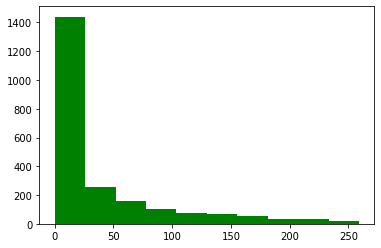

In [ ]:
plt.hist(df['MntFishProducts'], color='g')

In [ ]:
df['MntFishProducts'].describe()

count    2240.000000
mean       37.525446
std        54.628979
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64

#### **MntSweetProducts**
: Amount spent on sweets in last 2 years

(array([1588.,  260.,  132.,   96.,   59.,   55.,   31.,   17.,    0.,
           2.]),
 array([  0. ,  26.3,  52.6,  78.9, 105.2, 131.5, 157.8, 184.1, 210.4,
        236.7, 263. ]),
 <a list of 10 Patch objects>)

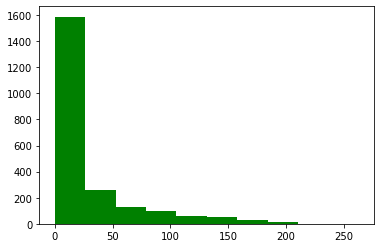

In [ ]:
plt.hist(df['MntSweetProducts'], color='g')

In [ ]:
df['MntSweetProducts'].describe()

count    2240.000000
mean       27.062946
std        41.280498
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       263.000000
Name: MntSweetProducts, dtype: float64

#### **MntGoldProds**
: Amount spent on gold in last 2 years

(array([1.397e+03, 3.910e+02, 1.880e+02, 1.060e+02, 7.700e+01, 4.800e+01,
        2.900e+01, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([  0. ,  36.2,  72.4, 108.6, 144.8, 181. , 217.2, 253.4, 289.6,
        325.8, 362. ]),
 <a list of 10 Patch objects>)

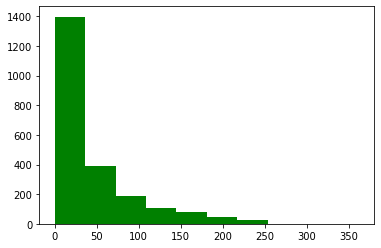

In [ ]:
plt.hist(df['MntGoldProds'], color='g')

In [ ]:
df['MntGoldProds'].describe()

count    2240.000000
mean       44.021875
std        52.167439
min         0.000000
25%         9.000000
50%        24.000000
75%        56.000000
max       362.000000
Name: MntGoldProds, dtype: float64

- 전체적으로 왼쪽으로 치우쳐진 분포를 보이고 있다.

### **Promotion**
- `NumDealsPurchases`: Number of purchases made with a discount
- `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### **NumDealsPurchases**

In [ ]:
df['NumDealsPurchases'].value_counts()

1     970
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
10      5
11      5
12      4
13      3
Name: NumDealsPurchases, dtype: int64

In [ ]:
df['NumDealsPurchases'].describe()

count    2240.000000
mean        2.325000
std         1.932238
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64

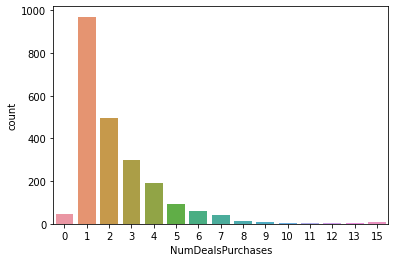

In [ ]:
sns.countplot(data=df,x='NumDealsPurchases')

In [ ]:
sum(df['NumDealsPurchases']==0)/2240 *100

2.0535714285714284

#### **AcceptedCmp1**

In [ ]:
df['AcceptedCmp1'].value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

(0.0, 2400.0)

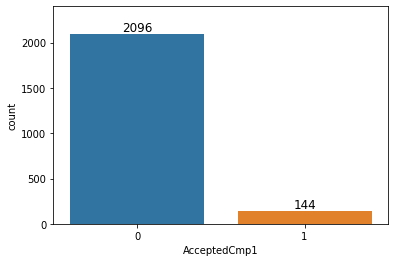

In [ ]:
ax = sns.countplot(data=df, x='AcceptedCmp1')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30 , height, ha = 'center', size = 12)
ax.set_ylim(0, 2400)

#### **AcceptedCmp2**

In [ ]:
df['AcceptedCmp2'].value_counts()

0    2210
1      30
Name: AcceptedCmp2, dtype: int64

(0.0, 2400.0)

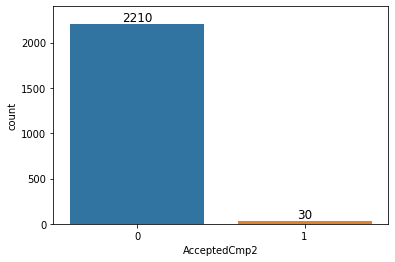

In [ ]:
ax=sns.countplot(data=df, x='AcceptedCmp2')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30 , height, ha = 'center', size = 12)
ax.set_ylim(0, 2400)

#### **AcceptedCmp3**

In [ ]:
df['AcceptedCmp3'].value_counts()

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

(0.0, 2400.0)

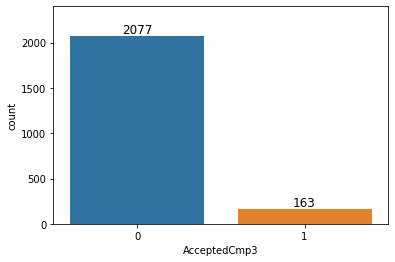

In [ ]:
ax=sns.countplot(data=df, x='AcceptedCmp3')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30 , height, ha = 'center', size = 12)
ax.set_ylim(0, 2400)

#### **AcceptedCmp4**

In [ ]:
df['AcceptedCmp4'].value_counts()

0    2073
1     167
Name: AcceptedCmp4, dtype: int64

(0.0, 2400.0)

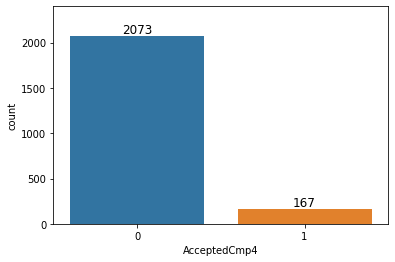

In [ ]:
ax=sns.countplot(data=df, x='AcceptedCmp4')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30 , height, ha = 'center', size = 12)
ax.set_ylim(0, 2400)

#### **AcceptedCmp5**

In [ ]:
df['AcceptedCmp5'].value_counts()

0    2077
1     163
Name: AcceptedCmp5, dtype: int64

(0.0, 2400.0)

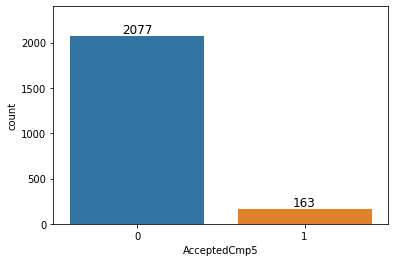

In [ ]:
ax=sns.countplot(data=df, x='AcceptedCmp5')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30 , height, ha = 'center', size = 12)
ax.set_ylim(0, 2400)

#### **Response**

In [ ]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

(0.0, 2100.0)

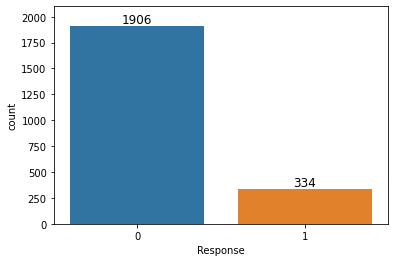

In [ ]:
ax=sns.countplot(data=df, x='Response')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30 , height, ha = 'center', size = 12)
ax.set_ylim(0, 2100)

- 전체적으로 Campaign에 참여하지 않는 고객의 수가 훨씬 많다.

### **Place**
- `NumWebPurchases`: Number of purchases made through the company’s website
- `NumCatalogPurchases`: Number of purchases made using a catalogue
- `NumStorePurchases`: Number of purchases made directly in stores
- `NumWebVisitsMonth`: Number of visits to company’s website in the last month

#### **NumWebPurchases**

In [ ]:
df['NumWebPurchases'].describe()

count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64

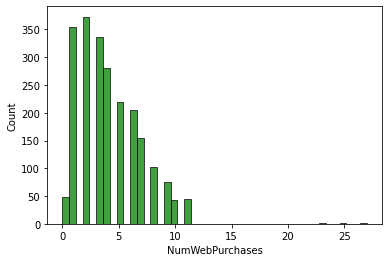

In [ ]:
# Histogram
sns.histplot(df['NumWebPurchases'], color='g')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


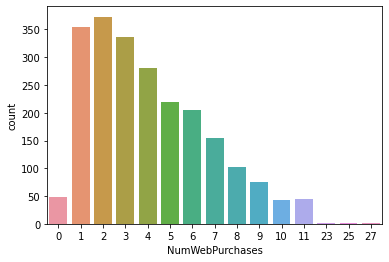

In [ ]:
sns.countplot(df['NumWebPurchases'])

#### **NumCatalogPurchases**

In [ ]:
df['NumCatalogPurchases'].describe()

count    2240.000000
mean        2.662054
std         2.923101
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64

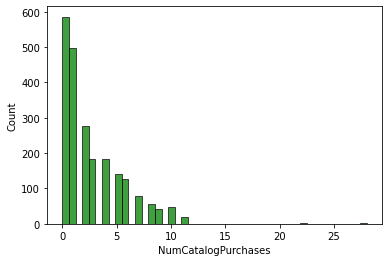

In [ ]:
# Histogram
sns.histplot(df['NumCatalogPurchases'], color='g')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


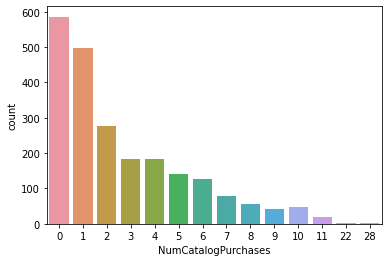

In [ ]:
sns.countplot(df['NumCatalogPurchases'])

#### **NumStorePurchases**

In [ ]:
df['NumStorePurchases'].describe()

count    2240.000000
mean        5.790179
std         3.250958
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64

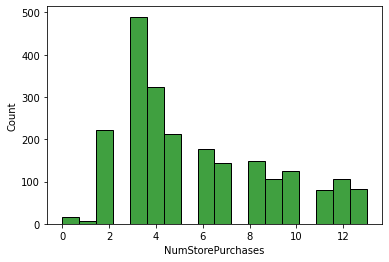

In [ ]:
# Histogram
sns.histplot(df['NumStorePurchases'], color='g')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


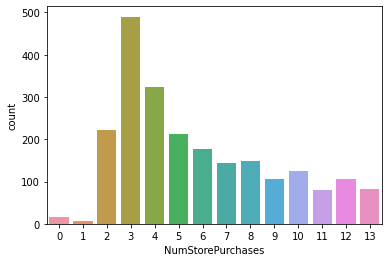

In [ ]:
sns.countplot(df['NumStorePurchases'])

#### **NumWebVisitsMonth**

In [ ]:
df['NumWebVisitsMonth'].describe()

count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


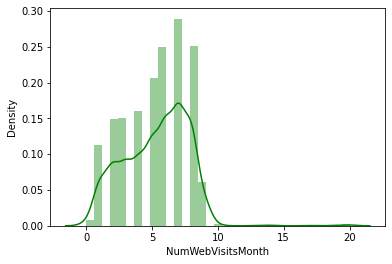

In [ ]:
# Histogram
sns.distplot(df['NumWebVisitsMonth'], color='g')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


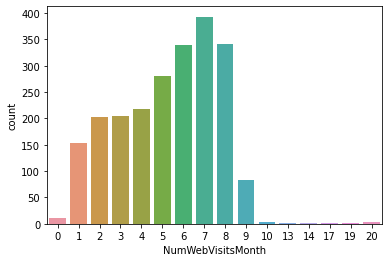

In [ ]:
sns.countplot(df['NumWebVisitsMonth'])

In [ ]:
sum(df['NumWebVisitsMonth']==0)

11